<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-04-27 21:28:48--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  69.3MB/s    in 2.2s    

2025-04-27 21:28:50 (69.3 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


Number of rows available for plotting: 0


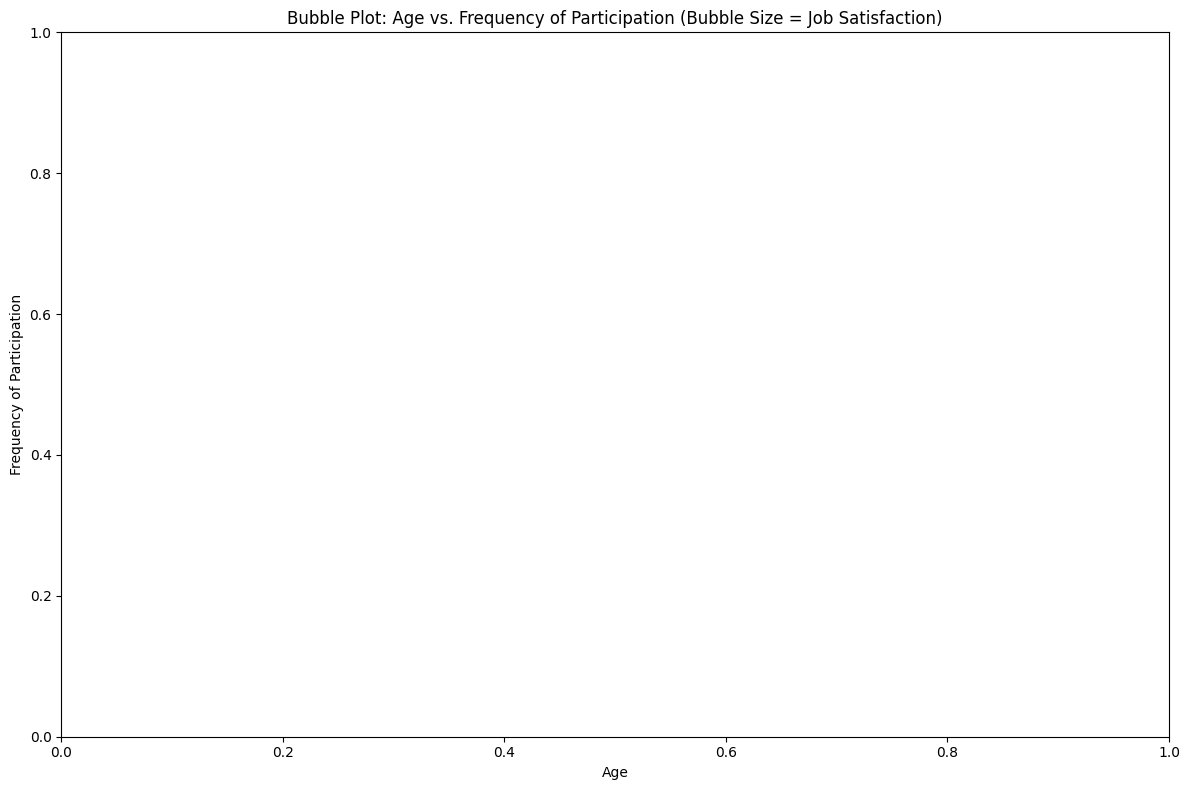

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("survey-data.csv")

# Step 1: Handle missing values and clean the data
df_clean = df.dropna(subset=['Age', 'SOPartFreq', 'JobSat']).copy()

# Step 2: Map the categorical 'SOPartFreq' values to numeric values
frequency_map = {
    'Multiple times per day': 4,
    'Daily or almost daily': 3,
    'A few times per week': 2,
    'A few times per month or weekly': 1,
    'Less than once per month or monthly': 0,
    'I have never participated in Q&A on Stack Overflow': 0
}
df_clean['SOPartFreq'] = df_clean['SOPartFreq'].map(frequency_map)

# Step 3: Fill missing values in 'JobSat' with the median (using direct assignment)
df_clean['JobSat'] = df_clean['JobSat'].fillna(df_clean['JobSat'].median())

# Step 4: Convert columns to numeric types
df_clean['Age'] = pd.to_numeric(df_clean['Age'], errors='coerce')
df_clean['SOPartFreq'] = pd.to_numeric(df_clean['SOPartFreq'], errors='coerce')

# Drop rows with NaN values introduced during conversion
df_clean = df_clean.dropna(subset=['Age', 'SOPartFreq', 'JobSat'])

# Step 5: Check if data is valid and contains values for plotting
print(f"Number of rows available for plotting: {df_clean.shape[0]}")

# Step 6: Create the bubble plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Age',
    y='SOPartFreq',
    size='JobSat',
    data=df_clean,
    sizes=(20, 400),  # Bubble size range
    alpha=0.6,
    color='teal',
    legend=False
)

# Set plot labels and title
plt.title('Bubble Plot: Age vs. Frequency of Participation (Bubble Size = Job Satisfaction)')
plt.xlabel('Age')
plt.ylabel('Frequency of Participation')

# Improve layout
plt.tight_layout()

# Show plot
plt.show()


#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


Number of rows available for plotting: 0


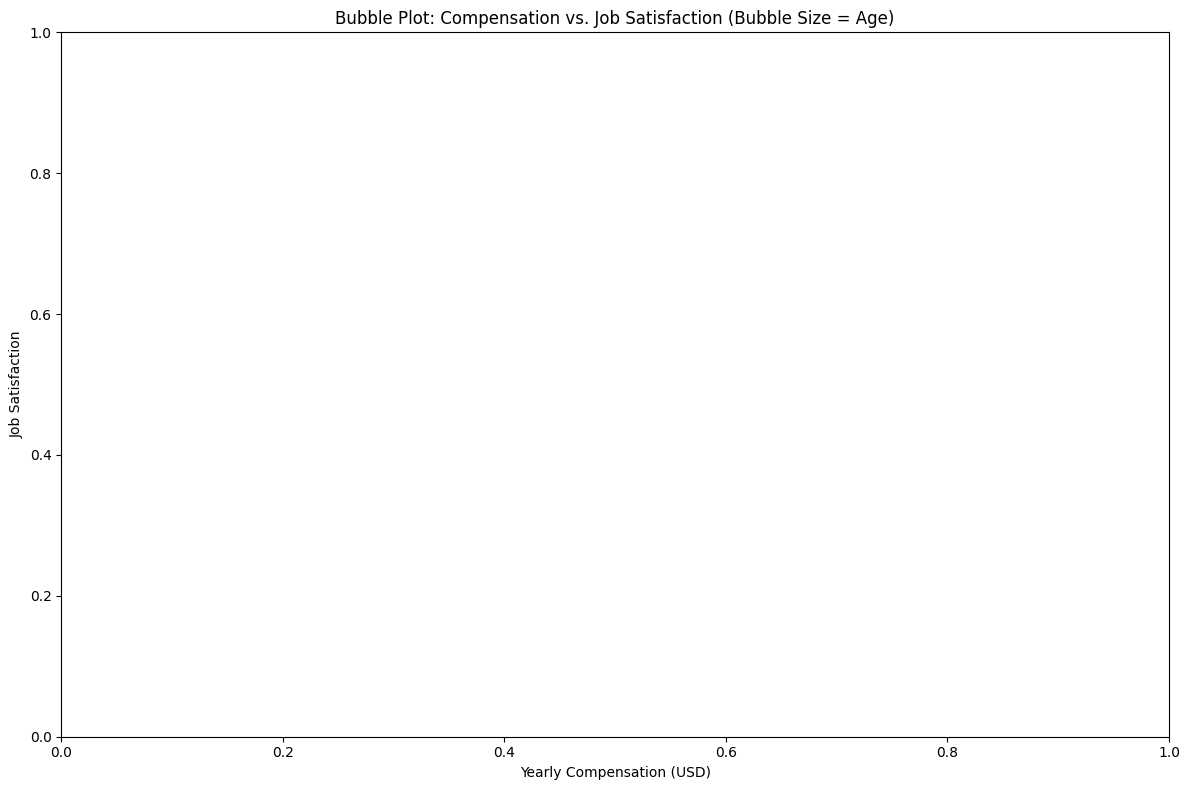

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("survey-data.csv")

# Step 1: Handle missing values and clean the data
df_clean = df.dropna(subset=['ConvertedCompYearly', 'JobSat', 'Age']).copy()

# Step 2: Convert columns to numeric types (if necessary)
df_clean['ConvertedCompYearly'] = pd.to_numeric(df_clean['ConvertedCompYearly'], errors='coerce')
df_clean['JobSat'] = pd.to_numeric(df_clean['JobSat'], errors='coerce')
df_clean['Age'] = pd.to_numeric(df_clean['Age'], errors='coerce')

# Step 3: Drop rows with NaN values after conversion
df_clean = df_clean.dropna(subset=['ConvertedCompYearly', 'JobSat', 'Age'])

# Step 4: Check if data is valid and contains values for plotting
print(f"Number of rows available for plotting: {df_clean.shape[0]}")

# Step 5: Create the bubble plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='ConvertedCompYearly',  # x-axis: Yearly Compensation
    y='JobSat',                # y-axis: Job Satisfaction
    size='Age',                # Bubble size: Age
    data=df_clean,
    sizes=(20, 400),           # Bubble size range
    alpha=0.6,                 # Transparency of bubbles
    color='teal',              # Color of the bubbles
    legend=False               # Hide legend for better clarity
)

# Set plot labels and title
plt.title('Bubble Plot: Compensation vs. Job Satisfaction (Bubble Size = Age)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction')

# Improve layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



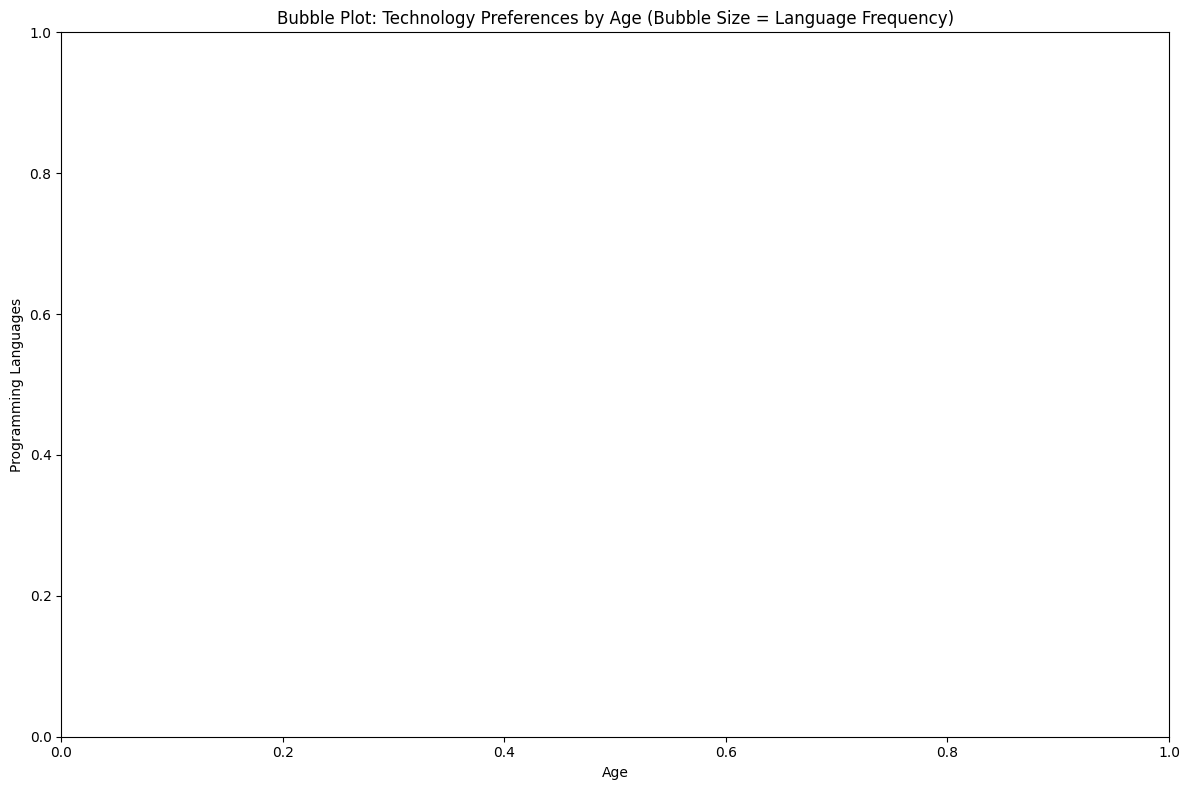

In [14]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("survey-data.csv")

# Clean the data: drop rows where 'LanguageHaveWorkedWith' or 'Age' are missing
df_clean = df.dropna(subset=['LanguageHaveWorkedWith', 'Age']).copy()

# Convert 'Age' to numeric values
df_clean['Age'] = pd.to_numeric(df_clean['Age'], errors='coerce')

# Step 1: Split 'LanguageHaveWorkedWith' to get individual languages
# Assume 'LanguageHaveWorkedWith' contains semi-colon separated languages
df_clean['Languages'] = df_clean['LanguageHaveWorkedWith'].str.split(';')

# Step 2: Explode the 'Languages' column so each row represents one language per respondent
df_exploded = df_clean.explode('Languages')

# Step 3: Count the frequency of each language by age
language_counts = df_exploded.groupby(['Languages', 'Age']).size().reset_index(name='Count')

# Step 4: Create the bubble plot
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='Age', 
    y='Languages', 
    size='Count',         # Size of bubbles based on frequency of the language
    data=language_counts,
    sizes=(20, 1000),     # Adjust the bubble size range
    alpha=0.6,            # Transparency of bubbles
    color='teal',         # Color of the bubbles
    legend=False          # Hide legend for clarity
)

# Set labels and title
plt.title('Bubble Plot: Technology Preferences by Age (Bubble Size = Language Frequency)')
plt.xlabel('Age')
plt.ylabel('Programming Languages')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


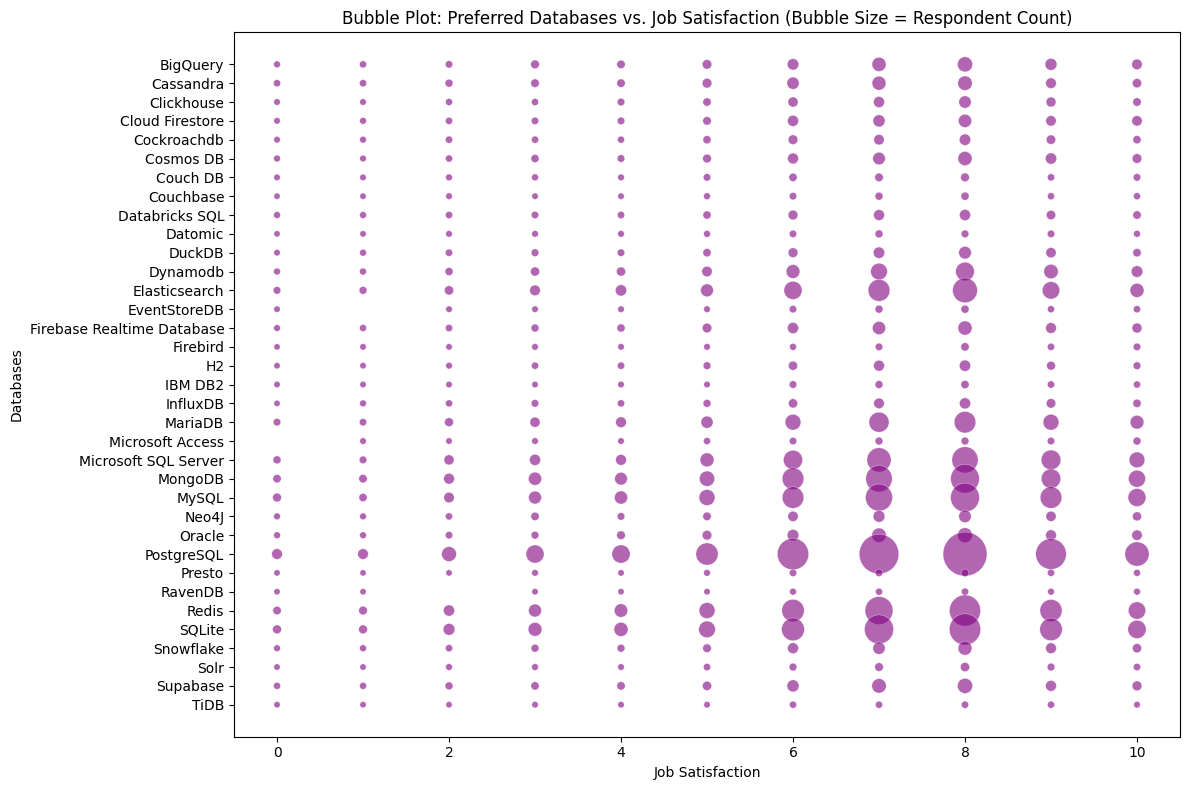

In [15]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("survey-data.csv")

# Clean the data: drop rows where 'DatabaseWantToWorkWith' or 'JobSat' are missing
df_clean = df.dropna(subset=['DatabaseWantToWorkWith', 'JobSat']).copy()

# Convert 'JobSat' to numeric values (assuming job satisfaction is numerical)
df_clean['JobSat'] = pd.to_numeric(df_clean['JobSat'], errors='coerce')

# Step 1: Split 'DatabaseWantToWorkWith' to get individual databases
# Assume 'DatabaseWantToWorkWith' contains semi-colon separated database preferences
df_clean['Databases'] = df_clean['DatabaseWantToWorkWith'].str.split(';')

# Step 2: Explode the 'Databases' column so each row represents one database per respondent
df_exploded = df_clean.explode('Databases')

# Step 3: Count the number of respondents for each database
database_counts = df_exploded.groupby(['Databases', 'JobSat']).size().reset_index(name='Count')

# Step 4: Create the bubble plot
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='JobSat', 
    y='Databases', 
    size='Count',         # Size of bubbles based on the number of respondents
    data=database_counts,
    sizes=(20, 1000),     # Adjust the bubble size range
    alpha=0.6,            # Transparency of bubbles
    color='purple',       # Color of the bubbles
    legend=False          # Hide legend for clarity
)

# Set labels and title
plt.title('Bubble Plot: Preferred Databases vs. Job Satisfaction (Bubble Size = Respondent Count)')
plt.xlabel('Job Satisfaction')
plt.ylabel('Databases')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


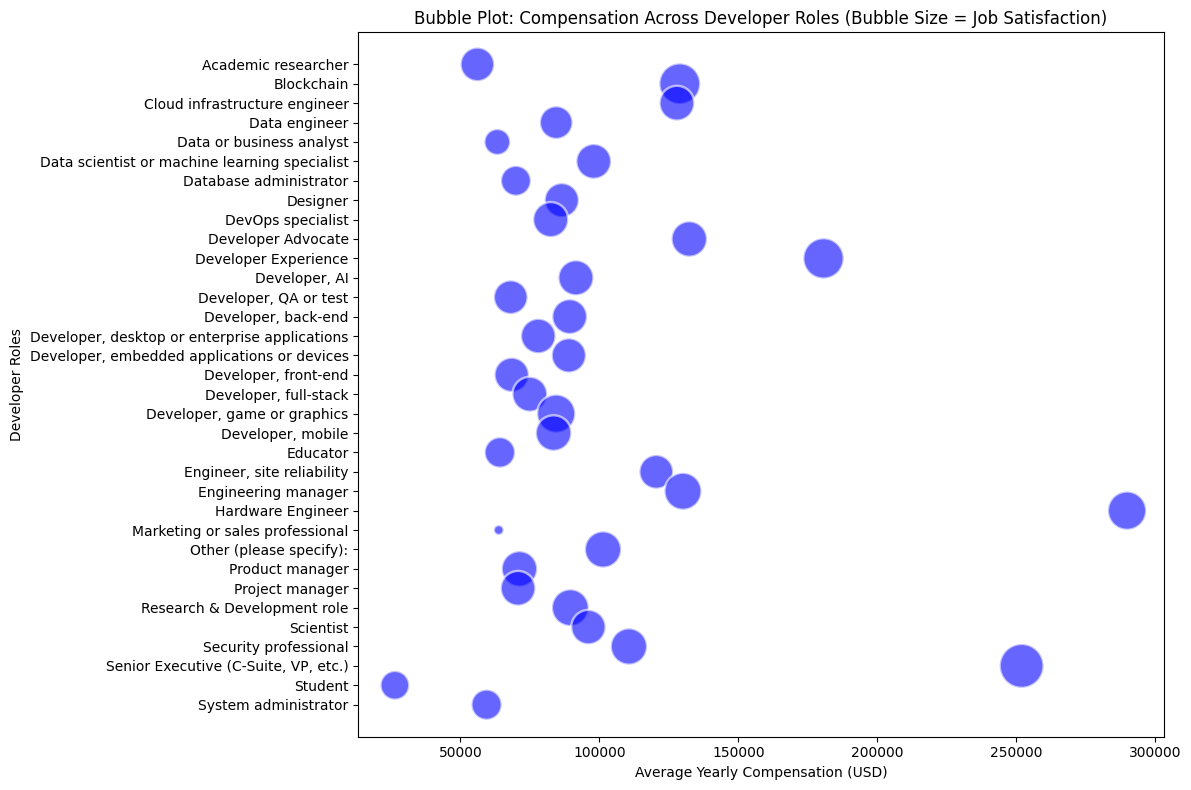

In [16]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("survey-data.csv")

# Clean the data: drop rows where 'DevType', 'ConvertedCompYearly' or 'JobSat' are missing
df_clean = df.dropna(subset=['DevType', 'ConvertedCompYearly', 'JobSat']).copy()

# Convert 'ConvertedCompYearly' and 'JobSat' to numeric
df_clean['ConvertedCompYearly'] = pd.to_numeric(df_clean['ConvertedCompYearly'], errors='coerce')
df_clean['JobSat'] = pd.to_numeric(df_clean['JobSat'], errors='coerce')

# Step 1: Group by 'DevType' and calculate the mean for 'ConvertedCompYearly' and 'JobSat'
df_grouped = df_clean.groupby('DevType').agg({
    'ConvertedCompYearly': 'mean', 
    'JobSat': 'mean'
}).reset_index()

# Step 2: Create the bubble plot
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='ConvertedCompYearly',   # Compensation on the x-axis
    y='DevType',               # Developer roles on the y-axis
    size='JobSat',             # Bubble size based on job satisfaction
    data=df_grouped,
    sizes=(50, 1000),          # Adjust the bubble size range
    alpha=0.6,                 # Transparency of bubbles
    color='blue',              # Color of the bubbles
    legend=False               # Hide the legend for clarity
)

# Set labels and title
plt.title('Bubble Plot: Compensation Across Developer Roles (Bubble Size = Job Satisfaction)')
plt.xlabel('Average Yearly Compensation (USD)')
plt.ylabel('Developer Roles')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


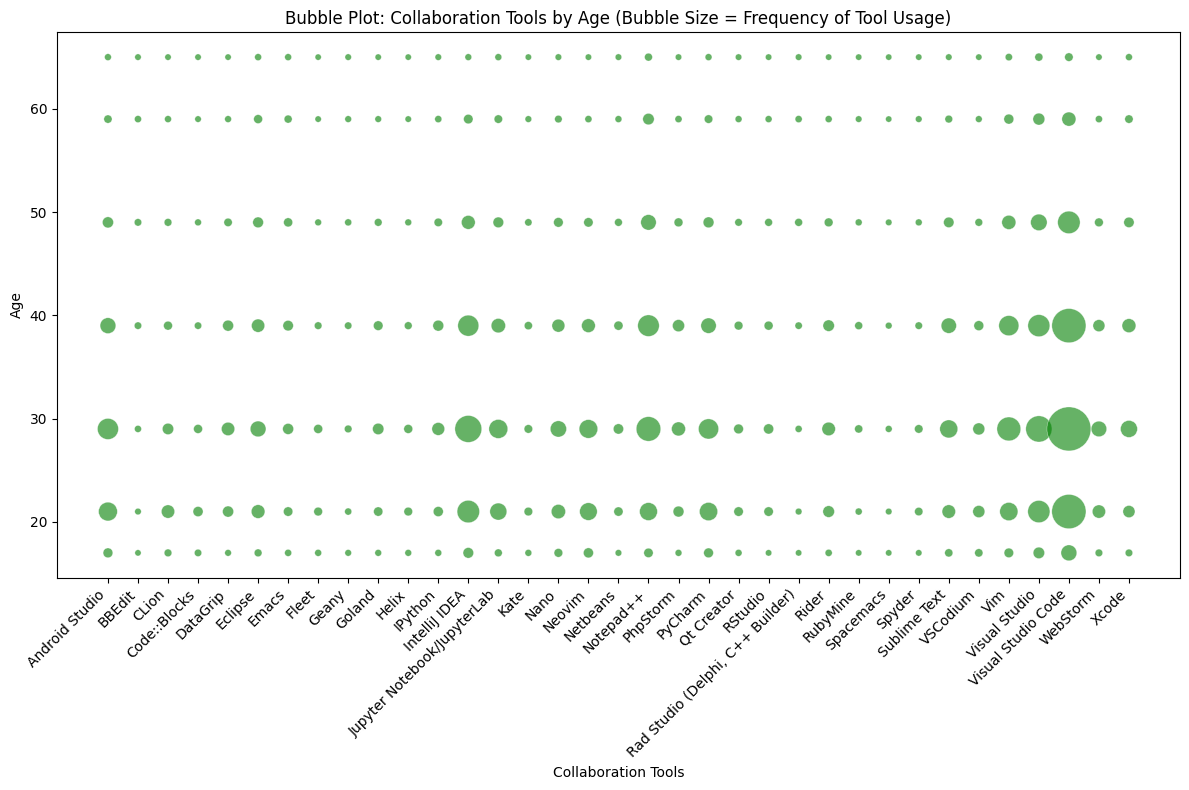

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("survey-data.csv")

# Clean the data: drop rows where 'NEWCollabToolsHaveWorkedWith' or 'Age' are missing
df_clean = df.dropna(subset=['NEWCollabToolsHaveWorkedWith', 'Age']).copy()

# Convert 'Age' to a numeric variable for better analysis (assuming age categories are in numerical form)
# Handle non-numeric values like 'Prefer not to say'
age_mapping = {
    'Under 18 years old': 17, 
    '18-24 years old': 21,
    '25-34 years old': 29, 
    '35-44 years old': 39, 
    '45-54 years old': 49,
    '55-64 years old': 59, 
    '65 years or older': 65
}

# Replace non-numeric age values with NaN and map age categories to numeric
df_clean['Age'] = df_clean['Age'].replace(age_mapping)

# Now handle any remaining non-numeric values, like 'Prefer not to say'
df_clean['Age'] = pd.to_numeric(df_clean['Age'], errors='coerce')

# Clean up the 'NEWCollabToolsHaveWorkedWith' column
df_clean['NEWCollabToolsHaveWorkedWith'] = df_clean['NEWCollabToolsHaveWorkedWith'].str.split(';')

# Step 1: Create a new DataFrame for counting tool usage frequency per age group
tool_usage = df_clean.explode('NEWCollabToolsHaveWorkedWith')

# Step 2: Count the frequency of each tool usage by age group
tool_usage_count = tool_usage.groupby(['Age', 'NEWCollabToolsHaveWorkedWith']).size().reset_index(name='ToolUsageFrequency')

# Step 3: Create the bubble plot
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='NEWCollabToolsHaveWorkedWith',  # Collaboration tools on the x-axis
    y='Age',                          # Age groups on the y-axis
    size='ToolUsageFrequency',        # Bubble size based on tool usage frequency
    data=tool_usage_count,
    sizes=(20, 1000),                 # Adjust bubble size range
    alpha=0.6,                        # Transparency of bubbles
    color='green',                    # Color of the bubbles
    legend=False                      # Hide the legend for clarity
)

# Set labels and title
plt.title('Bubble Plot: Collaboration Tools by Age (Bubble Size = Frequency of Tool Usage)')
plt.xlabel('Collaboration Tools')
plt.ylabel('Age')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



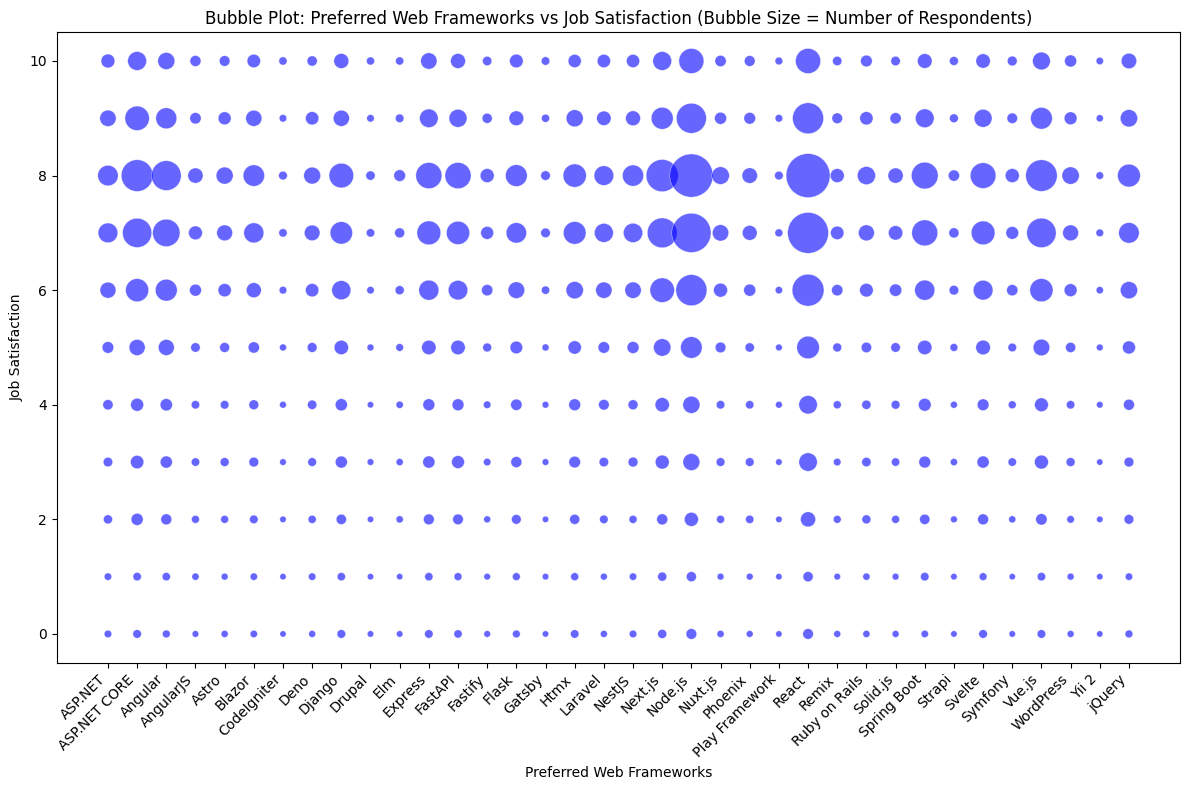

In [19]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("survey-data.csv")

# Clean the data: drop rows where 'WebframeWantToWorkWith' or 'JobSat' are missing
df_clean = df.dropna(subset=['WebframeWantToWorkWith', 'JobSat']).copy()

# Split the 'WebframeWantToWorkWith' column (since there could be multiple frameworks listed)
df_clean['WebframeWantToWorkWith'] = df_clean['WebframeWantToWorkWith'].str.split(';')

# Step 1: Create a new DataFrame for counting web framework usage frequency per job satisfaction level
framework_usage = df_clean.explode('WebframeWantToWorkWith')

# Step 2: Count the frequency of each framework and job satisfaction level
framework_usage_count = framework_usage.groupby(['WebframeWantToWorkWith', 'JobSat']).size().reset_index(name='RespondentCount')

# Step 3: Create the bubble plot
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='WebframeWantToWorkWith',  # Web frameworks on the x-axis
    y='JobSat',                   # Job satisfaction on the y-axis
    size='RespondentCount',       # Bubble size based on respondent count
    data=framework_usage_count,
    sizes=(20, 1000),             # Adjust bubble size range
    alpha=0.6,                    # Transparency of bubbles
    color='blue',                 # Color of the bubbles
    legend=False                  # Hide the legend for clarity
)

# Set labels and title
plt.title('Bubble Plot: Preferred Web Frameworks vs Job Satisfaction (Bubble Size = Number of Respondents)')
plt.xlabel('Preferred Web Frameworks')
plt.ylabel('Job Satisfaction')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



In [ ]:
##Write your code here

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
